# Background: 
A retail store called Cardio Good Fitness has data about customer of their threadmill products.

# Objective: 
1. Come up with a customer profile (characteristics of a customer) of the different products
2. Perform uni-variate and multi-variate analyses
3. Generate a set of insights and recommendations that will help the company in targeting new customers 



# Dataset:

* Product - the model no. of the treadmill
* Age - in no of years, of the customer
* Gender - of the customer
* Education - in no. of years, of the customer
* Marital Status - of the customer
* Usage - Avg. # times the customer wants to use the treadmill every week
* Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
* Income - of the customer
* Miles- expected to run



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Reading datasets by using read_csv from pandas package
fitness = pd.read_csv("CardioGoodFitness.csv")

In [5]:
# return the first 5 rows of the dataframe
fitness.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [6]:
# get the size of the dataframe
fitness.shape

(180, 9)

 **Observation:** The data contains 180 rows & 9 columns

In [8]:
# get the data types of all the attributes in the dataframe
fitness.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

**Observations:**
 1. Age,Education,Usage,Fitness,Incone & Miles columns are of integer data types 
 2. Product,Gender,MaritalStatuscolumns are of string data type

In [136]:
# get the info of all the attributes in the dataframe
fitness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


###  A statistical summary for all the datasets.

In [10]:
#return the statistical summary of the numeric attributes in the dataframe 
fitness.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


**Observation:** The mean and Median of customers age are 28.788889 & 26.0000 respectively. Also half the customers are between the age 18-26

In [13]:
fitness.isnull().sum() #to check if the data has any missing values

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

**Observation:** There are no missing values

In [16]:
#return all the attribute names in the data frame 
fitness.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [20]:
#create a dataframe grouped by the products
fitness_product = fitness.groupby(['Product']).count().reset_index()
fitness_product

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,80,80,80,80,80,80,80,80
1,TM498,60,60,60,60,60,60,60,60
2,TM798,40,40,40,40,40,40,40,40


**Observation:** There are 3 products that were sold TM195 , TM498 , TM798

**Characteristics of customers for Product TM195** 

In [25]:
# create a dataframe of all the customers who bought TM195
fitness_TM195 = fitness[fitness['Product']=='TM195']

In [28]:
# get the size of the dataframe
fitness_TM195.shape

(80, 9)

**Observation:** There are 80 customers who have bought TM195

In [27]:
#return the statistical summary of the numeric attributes in the dataframe
fitness_TM195.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,80.000000,80.000000,80.000000,80.00000,80.00000,80.000000
mean,28.550000,15.037500,3.087500,2.96250,46418.02500,82.787500
std,7.221452,1.216383,0.782624,0.66454,9075.78319,28.874102
min,18.000000,12.000000,2.000000,1.00000,29562.00000,38.000000
25%,23.000000,14.000000,3.000000,3.00000,38658.00000,66.000000
50%,26.000000,16.000000,3.000000,3.00000,46617.00000,85.000000
75%,33.000000,16.000000,4.000000,3.00000,53439.00000,94.000000
max,50.000000,18.000000,5.000000,5.00000,68220.00000,188.000000


**Observation:**
1. The age of the customers who bought TM195 are younger . The data is heavily skewed towards a younger population . 75% of the customers were between the ages of 18-33.  
2. Most customers (75%) where of average fit (rated themselves a 3.0)
3. Customers used the product for a average of 3 times a week 

In [36]:
# return the count of males and females customers who bought TM195
fitness_TM195['Gender'].value_counts()

Male      40
Female    40
Name: Gender, dtype: int64

**Observation:** Equal no. of men and women bought TM195

In [37]:
# get the marital status of  customers who bought TM195
fitness_TM195['MaritalStatus'].value_counts()

Partnered    48
Single       32
Name: MaritalStatus, dtype: int64

**Observation:** The no. of partnered customers were 50% more than single customer who bought TM195 

**Characteristics of customers for Product TM498**

In [29]:
# create a dataframe of all the customers who bought TM498
fitness_TM498 = fitness[fitness['Product']=='TM498']

In [30]:
# get the size of the dataframe
fitness_TM498.shape

(60, 9)

**Observation:** There are 60 customers who have bought TM498

In [31]:
#return the statistical summary of the numeric attributes in the dataframe
fitness_TM498.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000
mean,28.900000,15.116667,3.066667,2.90000,48973.650000,87.933333
std,6.645248,1.222552,0.799717,0.62977,8653.989388,33.263135
min,19.000000,12.000000,2.000000,1.00000,31836.000000,21.000000
25%,24.000000,14.000000,3.000000,3.00000,44911.500000,64.000000
50%,26.000000,16.000000,3.000000,3.00000,49459.500000,85.000000
75%,33.250000,16.000000,3.250000,3.00000,53439.000000,106.000000
max,48.000000,18.000000,5.000000,4.00000,67083.000000,212.000000


**Observation:**  
1.The age of the customers who bought TM195 are young . The data is heavily skewed towards a younger population . 75% of the customers were between the ages of 19-33.    
2.The customers (75%) were of average fit (rated themselves a 3.0)   
3.Customers used the product for a average of 3 times a week

In [104]:
# return the count of males and females customers who bought TM498
fitness_TM498['Gender'].value_counts()

Male      31
Female    29
Name: Gender, dtype: int64

**Observation:** No. of men and women bought TM498 is around the same (31 vs 29)

In [109]:
# get the marital status of  customers who bought TM498
fitness_TM498['MaritalStatus'].value_counts()

Partnered    36
Single       24
Name: MaritalStatus, dtype: int64

**Observation:** The no. of partnered customers were 50% more than single customer who bought TM498

**Characteristics of customers for Product TM798**

In [32]:
fitness_TM798 = fitness[fitness['Product']=='TM798']

In [33]:
# get the size of the dataframe
fitness_TM798.shape

(40, 9)

**Observation:** There are 40 customers who have bought TM798

In [34]:
#return the statistical summary of the numeric attributes in the dataframe
fitness_TM798.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000
mean,29.100000,17.325000,4.775000,4.625000,75441.57500,166.900000
std,6.971738,1.639066,0.946993,0.667467,18505.83672,60.066544
min,22.000000,14.000000,3.000000,3.000000,48556.00000,80.000000
25%,24.750000,16.000000,4.000000,4.000000,58204.75000,120.000000
50%,27.000000,18.000000,5.000000,5.000000,76568.50000,160.000000
75%,30.250000,18.000000,5.000000,5.000000,90886.00000,200.000000
max,48.000000,21.000000,7.000000,5.000000,104581.00000,360.000000


**Observation:**  
1.The age of the customers who bought TM798 are young . The data is heavily skewed towards a younger population . 50% of the customers were between the ages of 22-27.  

2.The customers (75%) were of average fit (rated themselves a 3.0)  

3.Customers ran an average of 167 miles 

In [105]:
# return the count of males and females customers who bought TM798
fitness_TM798['Gender'].value_counts()

Male      33
Female     7
Name: Gender, dtype: int64

**Observation:** TM798 was almost 5 times more popular with men than with Women

In [110]:
# get the marital status of  customers who bought TM798
fitness_TM798['MaritalStatus'].value_counts()

Partnered    23
Single       17
Name: MaritalStatus, dtype: int64

**Observation:**  The no. of partnered customers vs single customer who bought TM798  was more evenly distibuted than the other products

###  Distribution of Data 

In [121]:
# Get all the values of the attribute Fitness in the dataframe 
Fitness = fitness['Fitness']

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


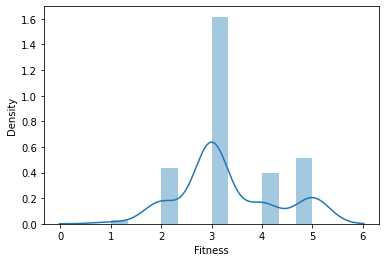

In [122]:
sns.distplot(Fitness); # plots a frequency polygon superimposed on a histogram for fitness levels of customers

**Observation:** Most customers are of average fitness.

In [124]:
# Get all the values of the attribute Income in the dataframe 
income = fitness['Income']

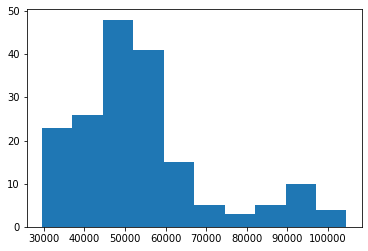

In [127]:
#Ploting a histogram to view the distribution of the income attribute in the dataframe. Distributing the income values in 10 intervals.
plt.hist(income , bins=10);

**Observation:** The income of the customer is skewed towards lower to average income

In [129]:
# Get all the values of the attribute Usage in the dataframe 
usage = income = fitness['Usage']

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


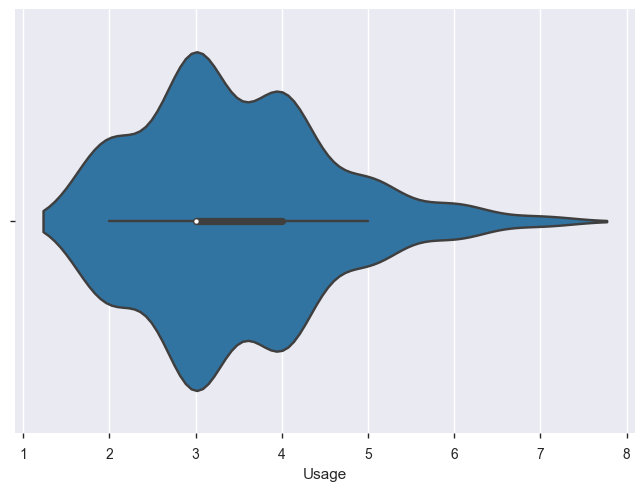

In [147]:
#Plot a violin plot to view the distribution of the usage attribute in the dataframe
sns.violinplot(usage);

**Observation:** The usage of the threadmills by most customers between 3-4 times a week 

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


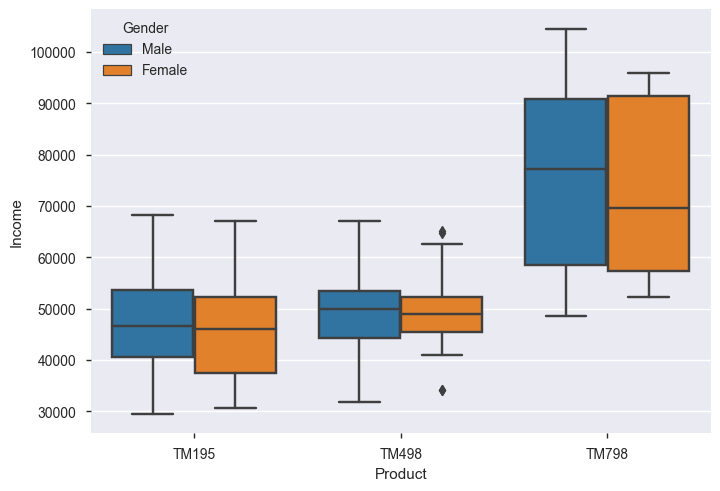

In [146]:
#Plot a box plot to view the distribution of the Income between males and females based on the different products in the dataframe
sns.boxplot(fitness['Product'], fitness['Income'], hue=fitness['Gender']);

**Observation:** The income distribution across product for between men and women are similar. There are a couple of outliers for female customers of the product TM498 . There are no outliers for any of the other customers.

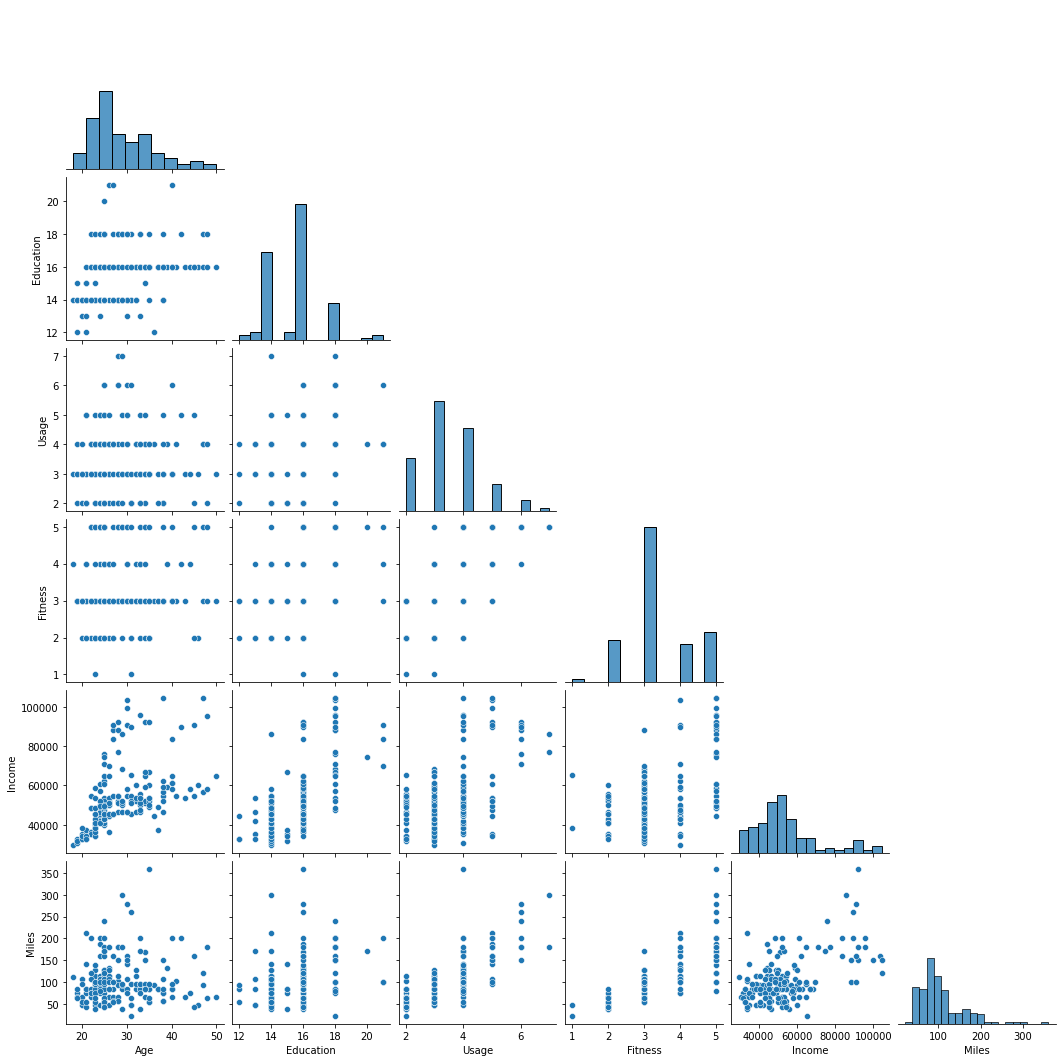

In [43]:
# plot a paor plot to visualization the relationship between the numeric attributes of the dataframe
sns.pairplot(fitness, corner=True);

In [44]:
# creating a 2-D Matrix with correlation plots
correlation = fitness.corr() 
correlation

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


In [90]:
# getting the probability value
from scipy.stats import pearsonr
pearsonr(fitness['Fitness'], fitness['Miles'])

(0.7857017433982374, 5.636793720298971e-39)

**Observation:** Expectedly , There is a high correlation between Fitness of the customer and the no. of miles run.

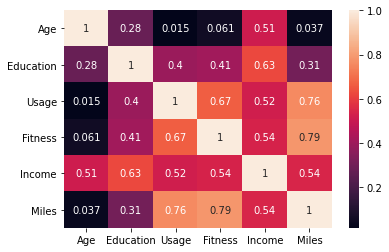

In [133]:
# ploting the correlation coeffiecients as a heatmap
sns.heatmap(fitness.corr(), annot=True); 

**Observation:** There is a high correlation between Usage & Fitness as well as Fitness & Miles.

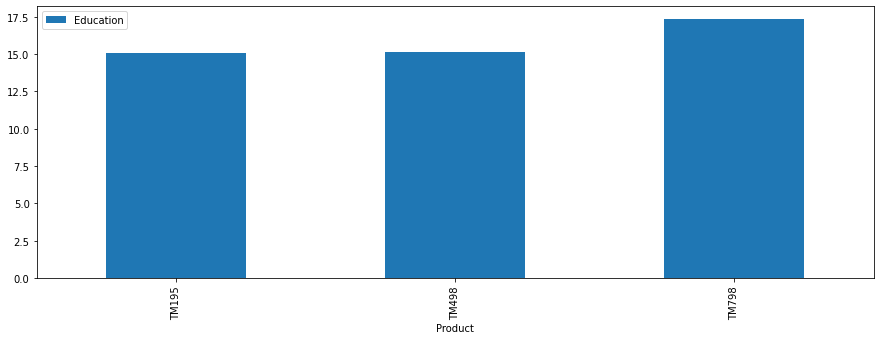

In [52]:
#Plot a box plot to view the average level of  Education based on the different products in the dataframe
fitness.groupby(by=['Product'])['Education'].mean().reset_index().plot(x='Product',y='Education',kind='bar',figsize=(15,5));

**Observation:** The more educated customers tend to prefer TM798 compared to the other customers 

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


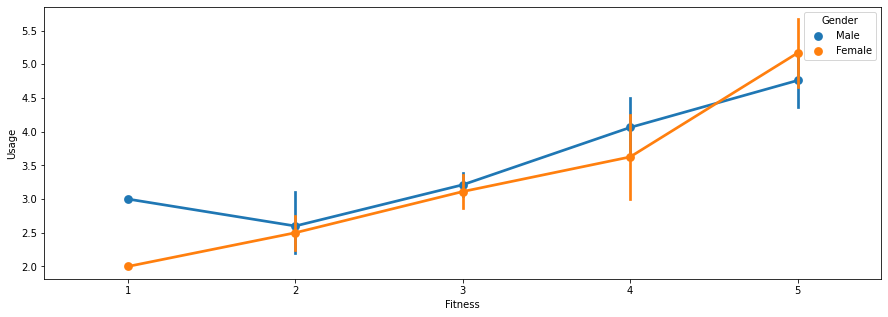

In [103]:
#Plot a line plot to view the relationship between the Fitness and Usage between males and females based on the different products in the dataframe
plt.figure(figsize=(15,5))

sns.pointplot(x="Fitness", y="Usage", hue = 'Gender',  data=fitness , ci=95)
plt.show()

**Observation:** For both Gender , the usage frequency per fitness level is similar. This applies to 95% of the data.

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


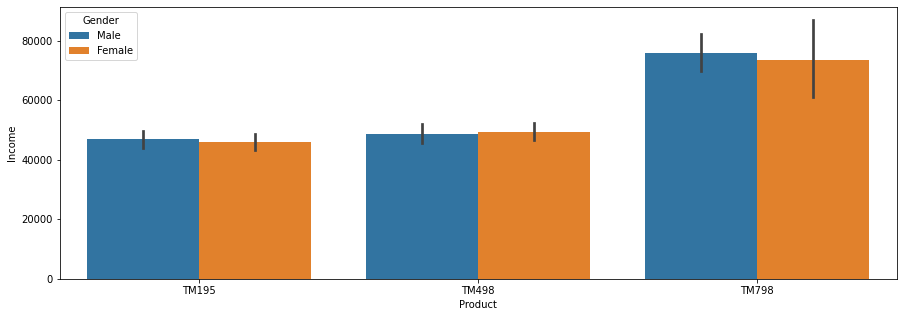

In [108]:
# Plot a bar plot to view the distribution between Income  between males and females based on the different products in the dataframe
plt.figure(figsize=(15,5))

sns.barplot(x="Product", y="Income", hue = 'Gender',  data=fitness)
plt.show()

**Observation:** the income distribution between men and women is relatively similar

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


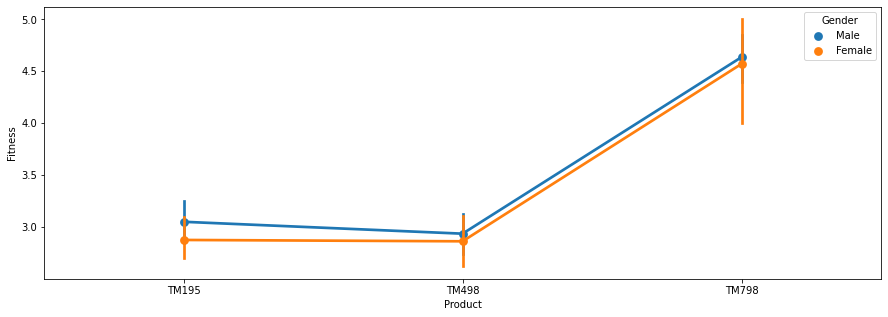

In [93]:
# Plot a line plot to view the distribution between Fitness between males and females based on the different products in the dataframe
plt.figure(figsize=(15,5))

sns.pointplot(x="Product", y="Fitness", hue = 'Gender',  data=fitness)
plt.show()

**Observation:** Fitness Fans (both male and female) love the TM798

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


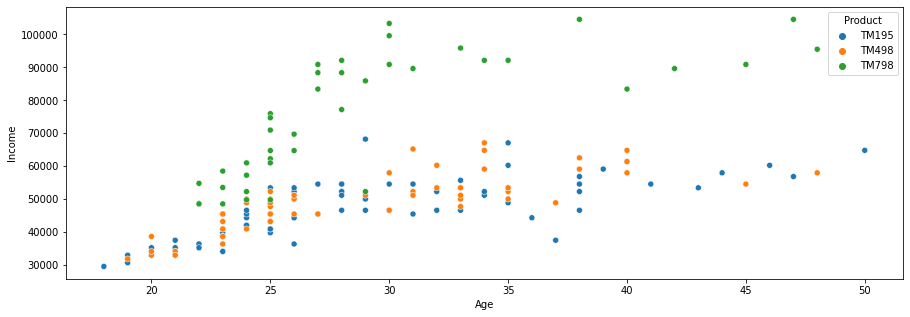

In [138]:
# Plot a scatter plot to view the relation between the Age and Income  based on the different products in the dataframe
figure = plt.figure(figsize=(15,5))

sns.scatterplot(fitness['Age'], fitness['Income'] , hue = fitness['Product']) ;

**Observation:** Across all ages , TM798 is used only by high income  individuals . Based on this scatter plot , It is also safe to say almost all High income individuals only use TM798 . This indicates the product is possibly pricier and hence not for the average buyer

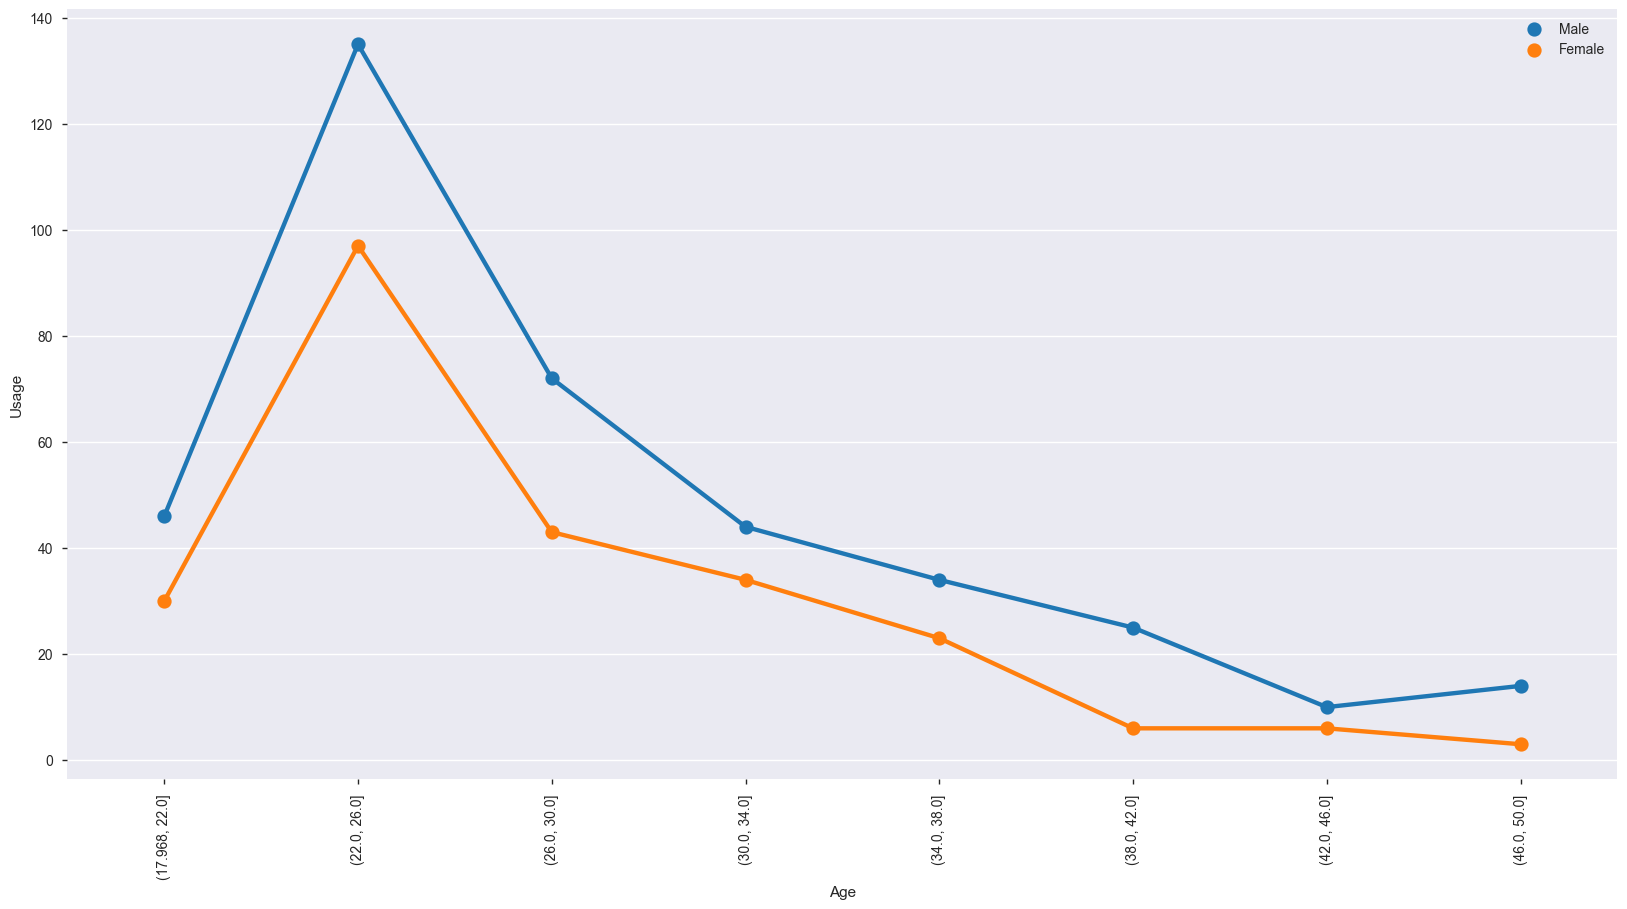

In [149]:
# Plot a line plot to view the relation between Age and Usage  between males and females based on the different products in the dataframe
plt.figure(figsize = (20,10))
sns.pointplot(x=pd.cut(fitness["Age"],8), y='Usage', data=fitness, estimator=sum, ci=None, hue = 'Gender')
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=90);

**Observation:** The most frequent users of the product for both Male and female are between the ages of 22- 26 

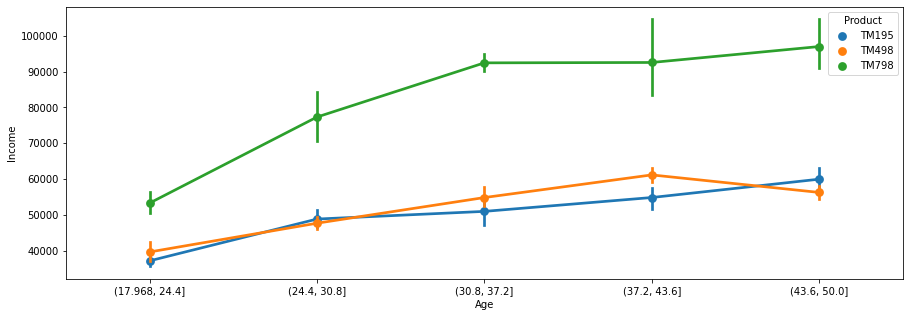

In [74]:
# Plot a line plot to view the relationship between Income & Age based on the different products in the dataframe
plt.figure(figsize=(15,5))

sns.pointplot(x=pd.cut(fitness["Age"],5), y="Income", hue = 'Product' ,data=fitness)
plt.show()

**Observation:** TM798 is the preferred choice of high income customers

# Conclusions & Recommendations:

* TM798 is the product with the least use. It seems to be catering to a niche customer class i.e. High Income indivduals , highly educated who are really into Fitness. High income individuals who are really into fitness. This niche class has strong competition from Peleton, Nordic Track, Bowflex etc. Can the Company compete in this space? Especially when the main customer base for Company seems to be people of average fitness, and average income
* TM195 was the best selling product , selling twice as many as TM798 and 50% more than TM498. However  financial metrics are not available , so it is hard to ascertain whether revenue vs margins on higher value products(as per customer ratings) like TM798.  If revenue is important , consider discontinuing product TM798 so that exisiting customers will be rediredted to the other product lines. However, if margin is important, and this product is a big contributor to margin, then worth keeping it. 
* Only 10% of all women customers bought TM798 even though the income distrubtion between the 2 genders was same , which suggests Women do not prefer TM798.  